## K Nearest Neighbours

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the data

In [16]:
dfx=pd.read_csv('xdata.csv')
dfy=pd.read_csv('ydata.csv')

In [17]:
X=dfx.values
Y=dfy.values

In [18]:
print(X.shape,Y.shape)

(399, 3) (399, 2)


In [19]:
#Removing index values
X=X[:,1:]
Y=Y[:,1:].reshape((-1,))
#print(X)
print(X.shape)
print(Y.shape)

(399, 2)
(399,)


In [20]:
print(Y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

### Visualizing the points in 2-D space
- query point is a sample point taken

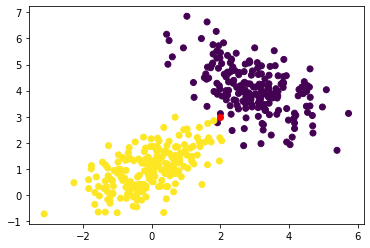

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y)
#Query Point
query_x=np.array([2,3])
plt.scatter(query_x[0],query_x[1],color="red")
plt.show()

In [22]:
#K-means Algorithm
#Euclidean distance
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    vals=[]
    m=X.shape[0]
    
    for i in range(m):
        d=dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    vals=sorted(vals)
    #Nearest/First K neighbors
    vals=vals[:k]
    
    vals=np.array(vals)
    
    #Gives the unique label values in the array
    new_vals=np.unique(vals[:,1],return_counts=True)
    
    #Take max freq and corresponsding class
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    return pred

In [23]:
x=knn(X,Y,query_x)
print(x)

0.0
